# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.9.2


# Исходные данные

In [4]:
df_bp = pd.read_excel("X_bp.xlsx",index_col=0)
df_bp

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [5]:
df_bp.drop(df_bp.index[0:23],inplace=True)
df_bp=df_bp.reset_index(drop=True)

In [6]:
df_nup = pd.read_excel("X_nup.xlsx",index_col=0)
df_nup

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.000000,57.000000
1.0,0.0,4.000000,60.000000
2.0,0.0,4.000000,70.000000
3.0,0.0,5.000000,47.000000
4.0,0.0,5.000000,57.000000
...,...,...,...
1035.0,90.0,8.088111,47.759177
1036.0,90.0,7.619138,66.931932
1037.0,90.0,9.800926,72.858286
1038.0,90.0,10.079859,65.519479


In [7]:
df_nup.drop(df_nup.index[0:40],inplace=True)
df_nup=df_nup.reset_index(drop=True)

# Объединение данных в датасет

In [8]:
df = df_bp.merge(df_nup, left_index=True,right_index=True, how='inner')
df
df = df_nup.join(df_bp,  how='inner')

# Предобработка и разверточный анализ данных

In [9]:
#посмотрим, какая информация содержится в датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1000 non-null   float64
 1   Шаг нашивки                           1000 non-null   float64
 2   Плотность нашивки                     1000 non-null   float64
 3   Соотношение матрица-наполнитель       1000 non-null   float64
 4   Плотность, кг/м3                      1000 non-null   float64
 5   модуль упругости, ГПа                 1000 non-null   float64
 6   Количество отвердителя, м.%           1000 non-null   float64
 7   Содержание эпоксидных групп,%_2       1000 non-null   float64
 8   Температура вспышки, С_2              1000 non-null   float64
 9   Поверхностная плотность, г/м2         1000 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1000 non-null   float64
 11  Прочность при раст

In [10]:
#посмотрим уникальность значений в колонках, выведем на экран последние 10 значений
for column in df.columns:
    print(f'Колонка {column}')
    print(sorted(df[column].unique())[-10:])

Колонка Угол нашивки, град
[0.0, 90.0]
Колонка Шаг нашивки
[13.3748547768973, 13.378772113231, 13.4849451024425, 13.5719207023593, 13.6539870540166, 13.732404403383, 14.0332153037961, 14.0513828180002, 14.3764512763632, 14.4405218753969]
Колонка Плотность нашивки
[85.6609961909375, 85.9871737934485, 86.0124270098611, 88.0724895050505, 88.8076471500205, 89.8766155103646, 92.0421393826707, 92.9634919477473, 98.2026027528147, 103.988901301494]
Колонка Соотношение матрица-наполнитель
[5.11078055270228, 5.12036847803355, 5.21044243868871, 5.25889457769596, 5.29584199270212, 5.3141436851035, 5.42513947440363, 5.45295943131032, 5.45556617827335, 5.59174159869754]
Колонка Плотность, кг/м3
[2158.79483589482, 2160.75143947764, 2161.56521646388, 2170.34236302043, 2172.24679646503, 2182.75182183283, 2184.49319952038, 2192.29763744164, 2192.73878348, 2207.77348061119]
Колонка модуль упругости, ГПа
[1511.68184145459, 1542.1684576617, 1543.02368299018, 1546.29088574472, 1572.09604227992, 1588.6772174

In [11]:
#проверим данные на пропуски
df.isna().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

In [12]:
#вывод - пропусков нет

# Основные статистические характеристики, в том числе средние и медианные значения характеристик

In [119]:
df.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1000.000000,995.000000,980.000000,994.000000,991.000000,998.000000,989.000000,999.000000,993.000000,998.000000,994.000000,985.000000,992.000000
mean,45.000000,6.875584,57.453443,2.925386,1974.663698,737.698515,110.294753,22.251847,285.793149,481.196483,73.310534,2461.013491,218.036691
std,45.022517,2.512355,11.360041,0.895235,71.165278,326.790343,27.111388,2.394877,39.915737,278.101743,3.050670,461.899641,57.952897
min,0.000000,0.037639,27.272928,0.547391,1784.482245,2.436909,35.599697,15.695894,179.374391,0.603740,65.553336,1250.392802,63.685698
25%,0.000000,5.133650,50.217314,2.319205,1924.201657,498.275517,92.401948,20.567437,258.760946,267.736782,71.304740,2145.015881,179.489091
50%,45.000000,6.904562,57.534784,2.906630,1977.302956,740.350683,109.907757,22.230779,285.811108,451.944708,73.230375,2459.524526,216.997341
75%,90.000000,8.542450,65.040740,3.550303,2020.628746,962.242762,129.821713,23.982301,313.184981,692.342336,75.336821,2751.998207,257.159001
max,90.000000,13.653987,86.012427,5.314144,2161.565216,1649.415706,181.828448,28.955094,386.067992,1291.340115,81.417126,3660.450210,359.052220


In [14]:
df.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

# Построение гистограмм

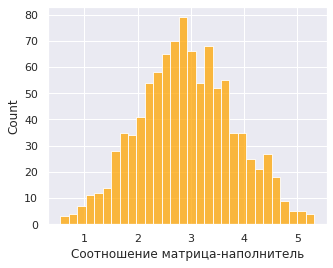

In [131]:
sns.histplot(df['Соотношение матрица-наполнитель'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

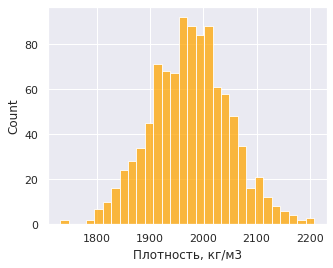

In [16]:
sns.histplot(df['Плотность, кг/м3'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

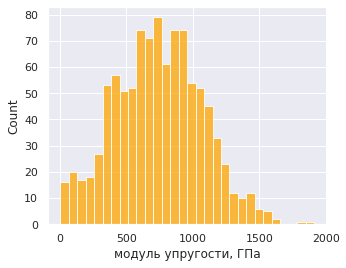

In [17]:
sns.histplot(df['модуль упругости, ГПа'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

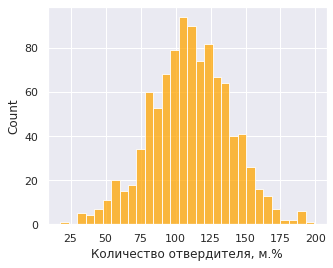

In [18]:
sns.histplot(df['Количество отвердителя, м.%'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

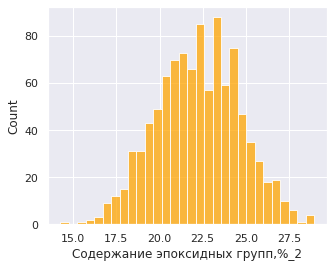

In [19]:
sns.histplot(df['Содержание эпоксидных групп,%_2'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

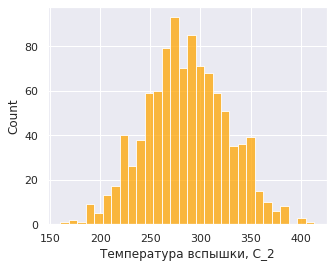

In [20]:
sns.histplot(df['Температура вспышки, С_2'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

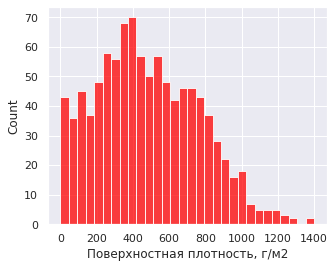

In [21]:
sns.histplot(df['Поверхностная плотность, г/м2'], kde=False, bins=30, color='red')
sns.set(rc={'figure.figsize':(5,4)})

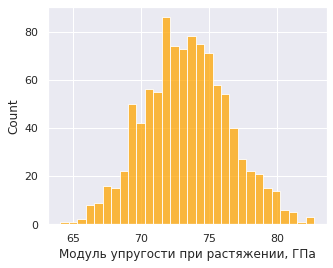

In [22]:
sns.histplot(df['Модуль упругости при растяжении, ГПа'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

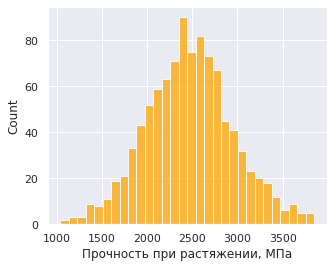

In [23]:
sns.histplot(df['Прочность при растяжении, МПа'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

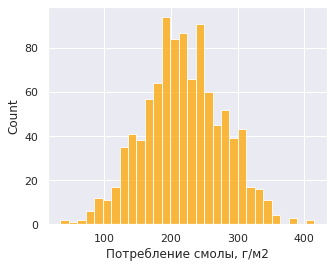

In [24]:
sns.histplot(df['Потребление смолы, г/м2'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

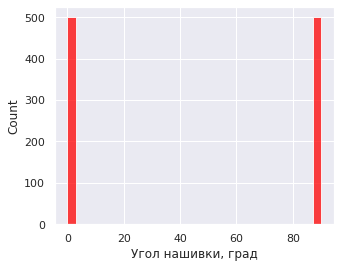

In [25]:
sns.histplot(df['Угол нашивки, град'], kde=False, bins=30, color='red')
sns.set(rc={'figure.figsize':(5,4)})

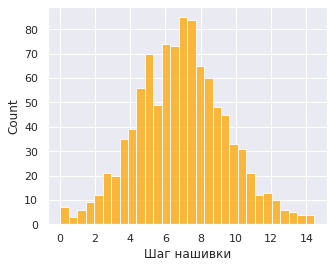

In [26]:
sns.histplot(df['Шаг нашивки'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

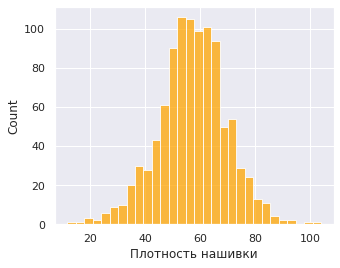

In [27]:
sns.histplot(df['Плотность нашивки'], kde=False, bins=30, color='orange')
sns.set(rc={'figure.figsize':(5,4)})

Для большинства характеристик распределение близко к нормальному

Исключение составляют:

- Поверхностная плотность, г/м2 - нормальное распределение со смещением вправо. Что свидетельствует о большем количестве измерений с меньшим показателем поверхностной алотности

- Угол нашивки, град - дискретное распределение, так как колонка содержит всего два уникальных значения



# Построение диаграммы "ящик с усами"

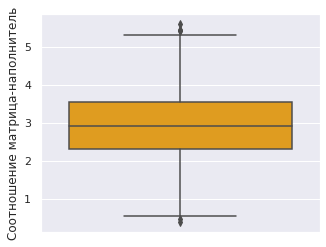

In [29]:
sns.boxplot(y='Соотношение матрица-наполнитель', data=df, color='orange')

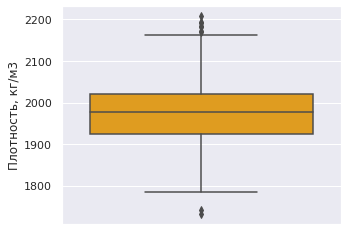

In [30]:
sns.boxplot(y='Плотность, кг/м3', data=df, color='orange')

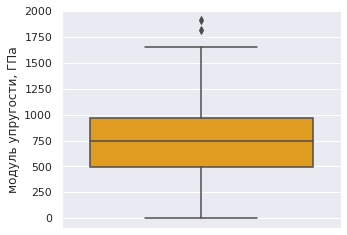

In [31]:
sns.boxplot(y='модуль упругости, ГПа', data=df, color='orange')

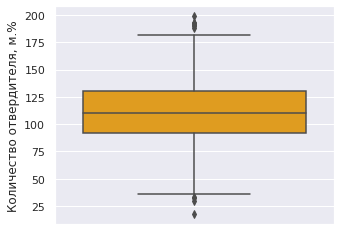

In [32]:
sns.boxplot(y='Количество отвердителя, м.%', data=df, color='orange')

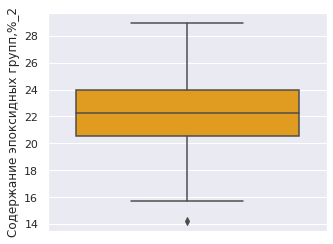

In [33]:
sns.boxplot(y='Содержание эпоксидных групп,%_2', data=df, color='orange')

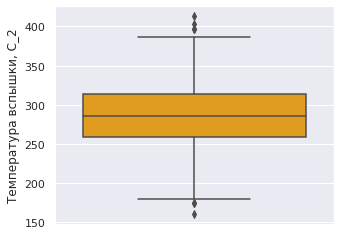

In [34]:
sns.boxplot(y='Температура вспышки, С_2', data=df, color='orange')

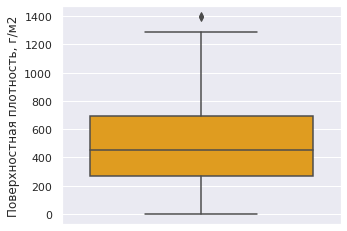

In [35]:
sns.boxplot(y='Поверхностная плотность, г/м2', data=df, color='orange')

Наблюдается смещение в сторону малых значений

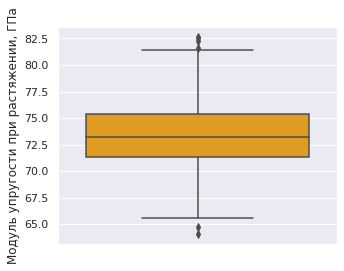

In [36]:
sns.boxplot(y='Модуль упругости при растяжении, ГПа', data=df, color='orange')

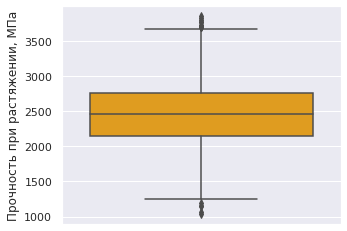

In [37]:
sns.boxplot(y='Прочность при растяжении, МПа', data=df, color='orange')

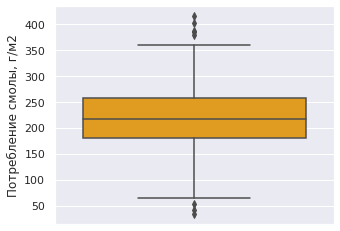

In [38]:
sns.boxplot(y='Потребление смолы, г/м2', data=df, color='orange')

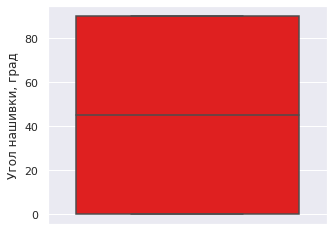

In [39]:
sns.boxplot(y='Угол нашивки, град', data=df, color='red')

Дискретная величина, график не показателен

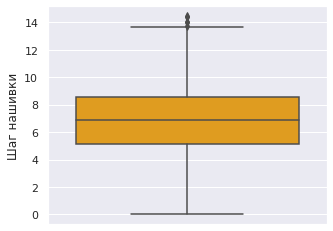

In [40]:
sns.boxplot(y='Шаг нашивки', data=df, color='orange')

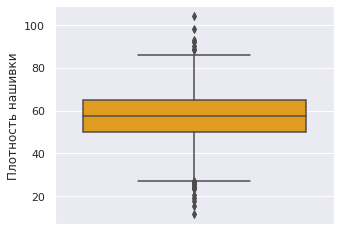

In [41]:
sns.boxplot(y='Плотность нашивки', data=df, color='orange')

Выбросы наблюдаются по всем характеристикам, кроме угла нашивки.

# Построим попарные графики рассеяния точек

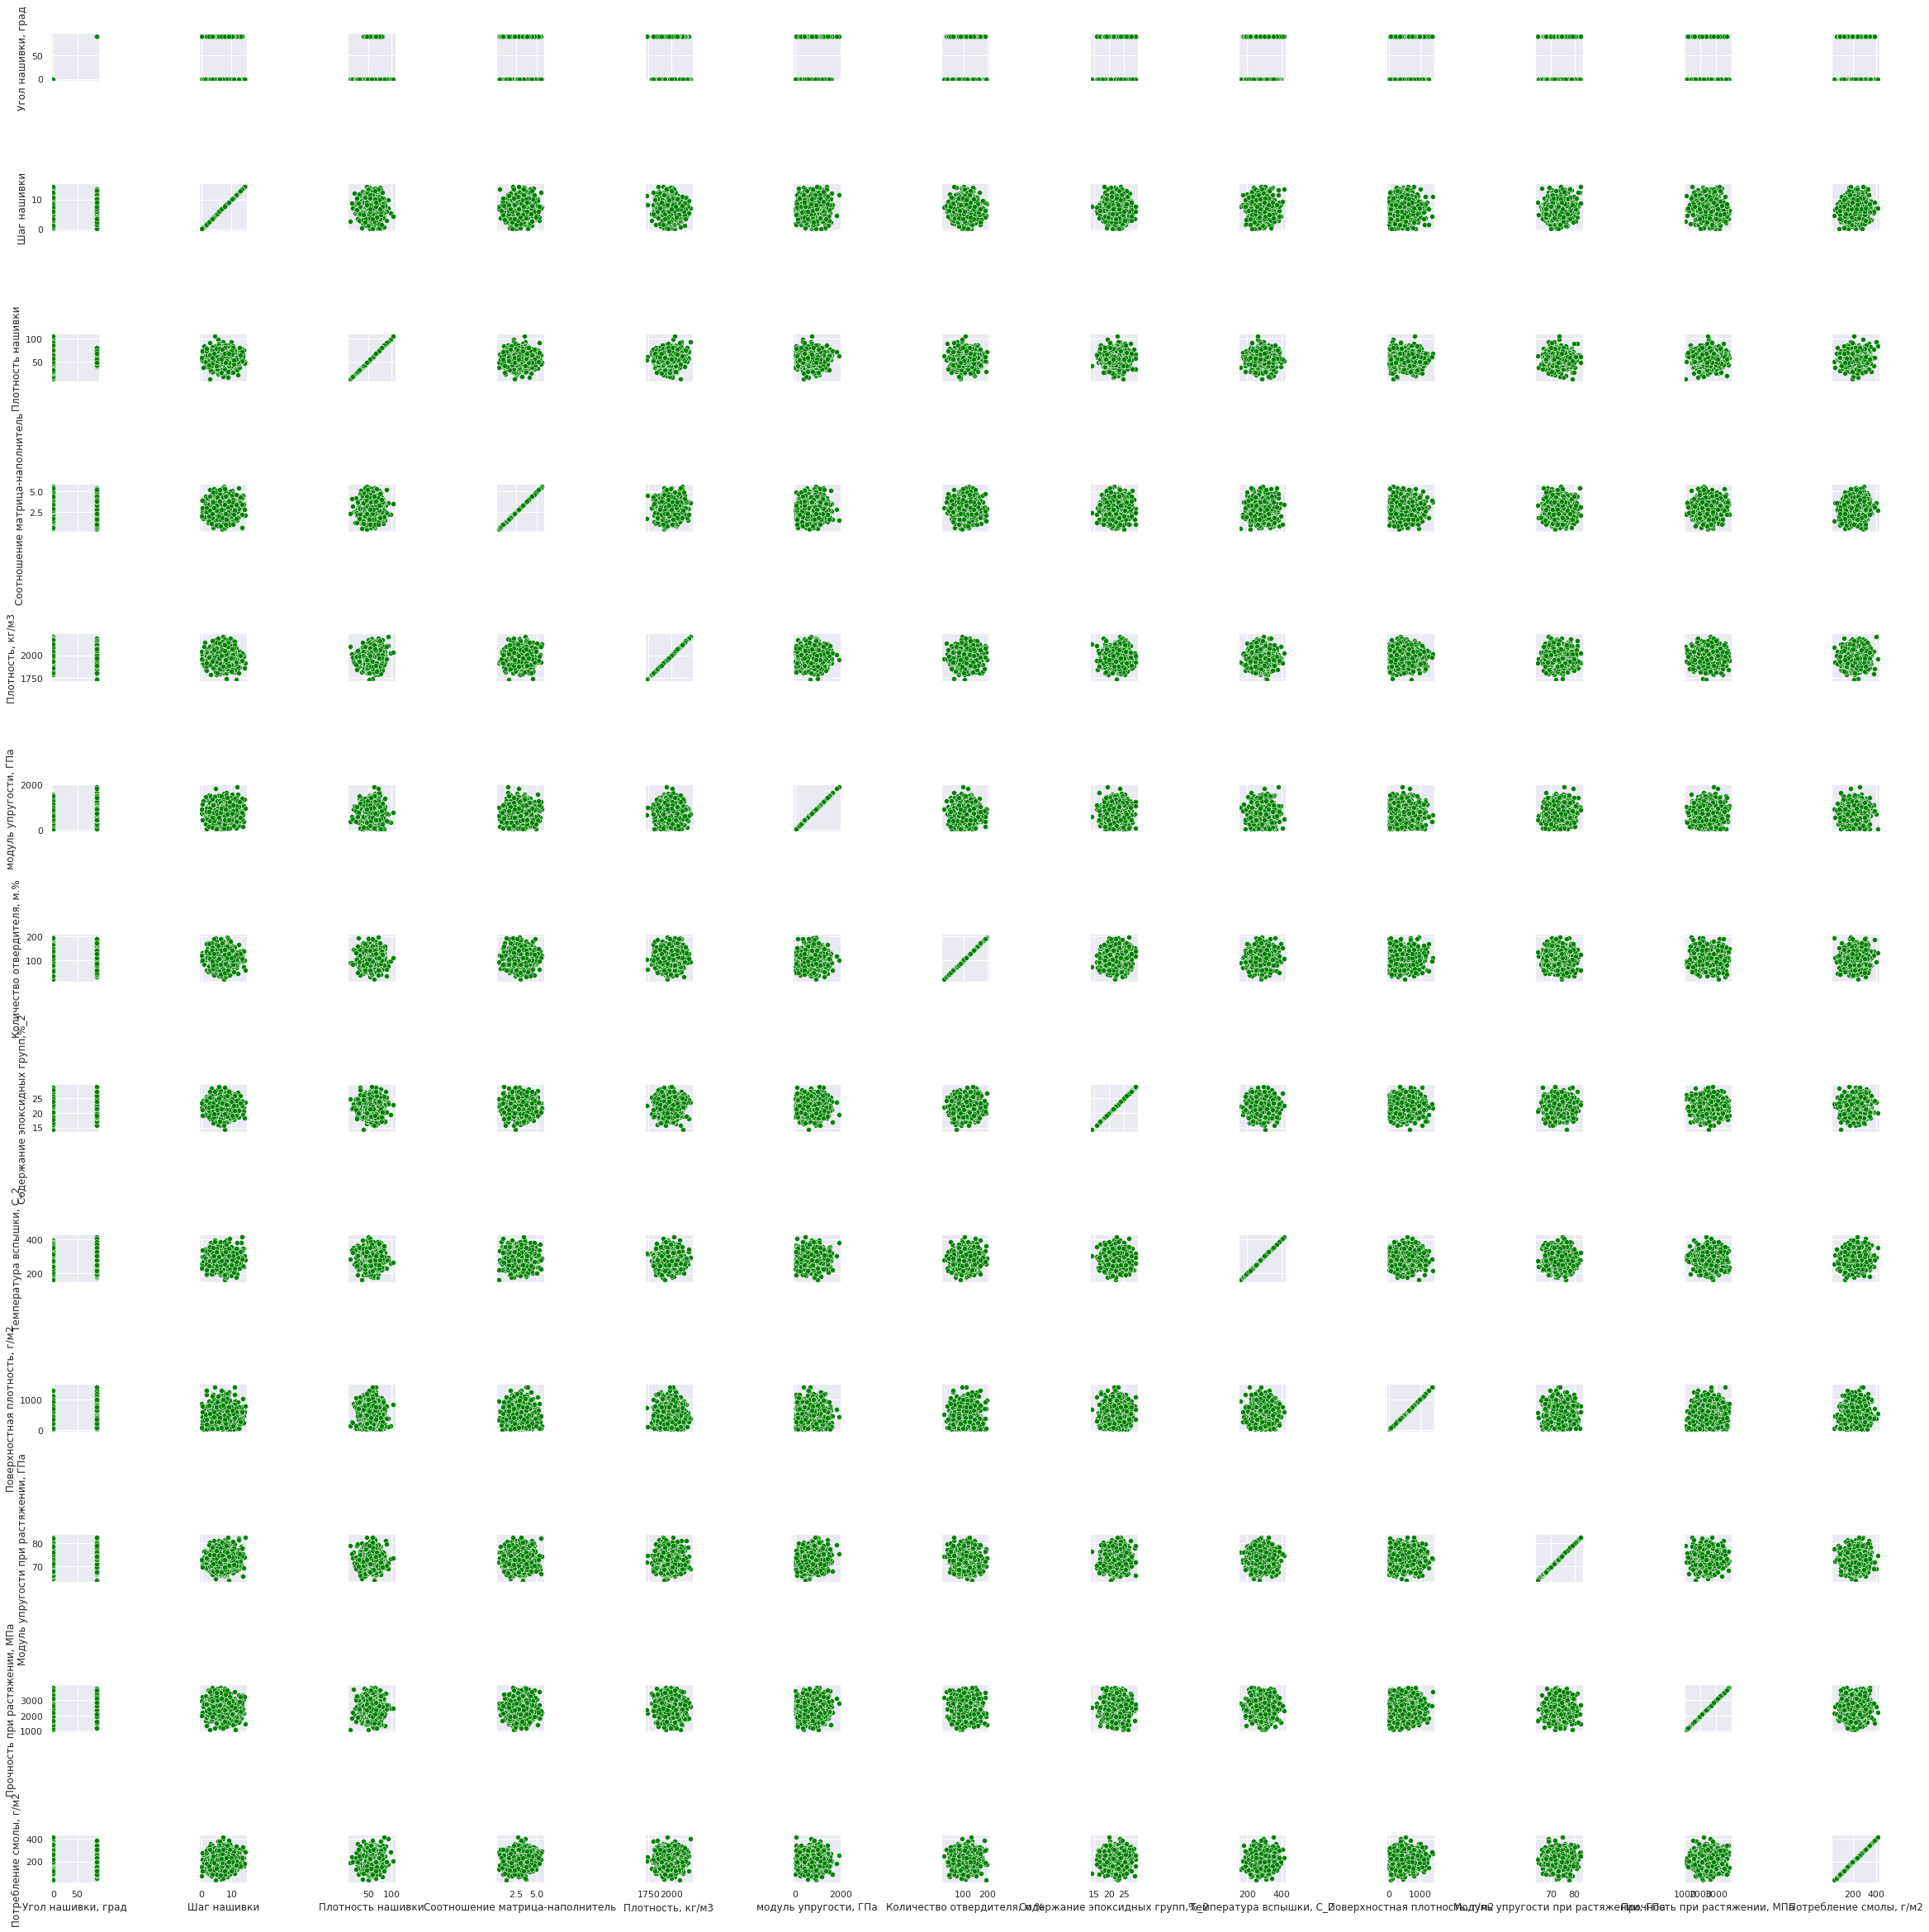

In [42]:
columns = df.columns
g = sns.PairGrid(df[columns])
g.map(sns.scatterplot, color ='green')

Графики показывают отсутствие зависимости между переменными датасета.

# Исследование датасета. Применение коэффициента корреляции

In [43]:
df.corr()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
"Угол нашивки, град",1.000000,0.027593,0.114680,-0.017648,-0.063085,-0.036682,0.027478,-0.010491,0.006371,0.028886,0.013306,0.027160,-0.000349
Шаг нашивки,0.027593,1.000000,-0.002120,0.003872,-0.059891,0.023334,-0.040893,-0.006281,0.013975,-0.010481,0.038564,-0.063203,0.016095
Плотность нашивки,0.114680,-0.002120,1.000000,0.047208,0.034952,-0.014098,-0.001520,-0.041274,-0.017846,-0.005347,0.015600,-0.014026,0.014545
Соотношение матрица-наполнитель,-0.017648,0.003872,0.047208,1.000000,0.011033,0.032246,-0.017575,0.027885,-0.011712,-0.011906,-0.017502,0.036288,0.078841
"Плотность, кг/м3",-0.063085,-0.059891,0.034952,0.011033,1.000000,-0.017544,-0.032137,-0.011680,-0.018260,0.038236,-0.020699,-0.074165,-0.027946
"модуль упругости, ГПа",-0.036682,0.023334,-0.014098,0.032246,-0.017544,1.000000,0.023490,-0.006186,0.031181,-0.017841,0.014482,0.048217,-0.007369
"Количество отвердителя, м.%",0.027478,-0.040893,-0.001520,-0.017575,-0.032137,0.023490,1.000000,0.013484,0.081562,0.048636,-0.076936,-0.066785,0.008184
"Содержание эпоксидных групп,%_2",-0.010491,-0.006281,-0.041274,0.027885,-0.011680,-0.006186,0.013484,1.000000,-0.008072,-0.007685,0.064757,-0.031613,0.015057
"Температура вспышки, С_2",0.006371,0.013975,-0.017846,-0.011712,-0.018260,0.031181,0.081562,-0.008072,1.000000,0.015638,0.023145,-0.026122,0.061615
"Поверхностная плотность, г/м2",0.028886,-0.010481,-0.005347,-0.011906,0.038236,-0.017841,0.048636,-0.007685,0.015638,1.000000,0.014983,0.013333,0.001071


# Построим тепловую карту коэффициентов корреляции

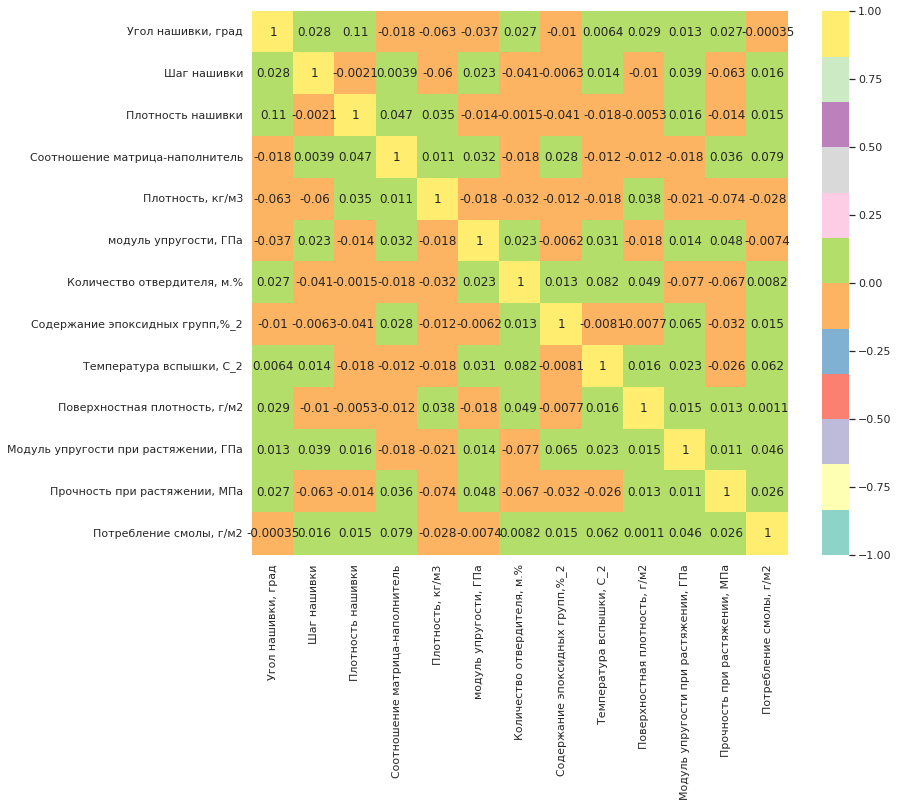

In [44]:
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'Set3')

Все полученные коэффициенты корреляции находятся в промежутке значений от - 0,25 до 0,25.
Вывод: исходный датасет был предварительно обработан и переменные являются независимыми.

# Предобработка данных и удаление выбросов

In [45]:
for column in df.columns:
    q75,q25 = np.percentile(df.loc[:,column],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[column] < min,column] = np.nan
    df.loc[df[column] > max,column] = np.nan

In [46]:
df.isnull().sum()

Угол нашивки, град                       0
Шаг нашивки                              5
Плотность нашивки                       20
Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             11
Содержание эпоксидных групп,%_2          1
Температура вспышки, С_2                 7
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           15
Потребление смолы, г/м2                  8
dtype: int64

Количество выбросов говорит о их незначительности, поэтому их можно удалить из датасета

In [47]:
df_used = df.dropna(axis = 0)

# Определение размера датасета после удаления выбросов и проверка наличия пропусков
print("Размер датасета после удаления выбросов и проверка наличия пропусков: \n",
      "\nКоличество строк в очищенном датасете: ", df_used.shape[0], 
      "\nКоличество столбцов (переменных) в очищенном датасете: ", df_used.shape[1],
      "\nКоличество пропусков в данных очищенного датасета: ", df_used.isna().sum().sum())

Размер датасета после удаления выбросов и проверка наличия пропусков: 
 
Количество строк в очищенном датасете:  918 
Количество столбцов (переменных) в очищенном датасете:  13 
Количество пропусков в данных очищенного датасета:  0


# Новые основные статистические характеристика датасета

In [48]:
df_used.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,46.372549,6.839158,57.481572,2.931808,1973.573912,737.781357,110.810569,22.249129,285.597958,484.101182,73.311881,2459.931673,217.786977
std,45.003581,2.527857,11.357524,0.896233,70.700233,328.584201,27.124289,2.415487,39.937888,278.715166,3.044495,454.081763,57.811632
min,0.000000,0.037639,27.272928,0.547391,1784.482245,2.436909,35.599697,15.695894,179.374391,0.603740,65.553336,1250.392802,63.685698
25%,0.000000,5.081732,50.275385,2.339031,1923.774940,498.275517,92.557414,20.554570,258.469516,270.651546,71.225212,2148.175736,178.664754
50%,90.000000,6.862404,57.471971,2.908811,1976.572096,733.016158,110.589285,22.230545,285.853960,457.732246,73.247594,2452.346918,216.759171
75%,90.000000,8.499907,65.094083,3.550303,2019.594439,963.005895,130.404874,23.994431,313.069462,696.010589,75.365124,2751.233766,256.995883
max,90.000000,13.653987,86.012427,5.314144,2161.565216,1649.415706,181.828448,28.955094,386.067992,1291.340115,81.417126,3660.450210,359.052220


Наблюдаем уменьшение количества строк датасета. Датасет очищен от выбросов
Попробуем выделить наиболее весомые признаки датасета при помощи факторного анализа

Обратимся к методам функционального анализа главных компонент для поиска скрытых факторов влияющих на свойства композита

In [49]:
from sklearn.decomposition import PCA


Определим вклад влияния 90% факторов

In [50]:
pca = PCA(n_components=.9)
pca.fit(df_used)
print(pca.explained_variance_ratio_)

[0.51000518 0.26721079 0.19123741]


Можно сделать вывод, что влияние очень слабое. Проведем анализ с целью определения весов характеристик датасета для первых пяти факторов влияния последовательно добавляя по одному фактору

In [51]:
print (pca.components_)

[[-1.71750362e-03  3.81415119e-04  1.05020116e-03 -8.43975415e-05
   1.33484084e-02 -3.91250040e-02  2.76497074e-03  4.46494504e-05
   4.71380076e-04  1.08117976e-02 -1.76152978e-04 -9.99077501e-01
  -2.49003341e-03]
 [-6.36383906e-03  5.84984312e-05  1.99121505e-04  1.08243995e-04
  -1.07191228e-03  9.94108032e-01  3.61174085e-03 -6.33425018e-06
   4.40595957e-03 -1.00365690e-01 -5.20869780e-05 -4.00046404e-02
  -1.18958360e-03]
 [ 3.02436367e-03 -1.68701256e-04  3.84467743e-04  5.84854566e-05
   2.04838789e-02  1.00715219e-01  3.41824333e-03 -9.01084221e-05
   3.86109501e-03  9.94656184e-01  1.31773180e-04  7.10756829e-03
  -3.07709752e-03]]


In [52]:
print ('Explained variance by component: %s' % pca.explained_variance_ratio_)

Explained variance by component: [0.51000518 0.26721079 0.19123741]


In [53]:
pca.singular_values_

array([13757.26659208,  9957.99379647,  8424.2508072 ])

In [54]:
pca.explained_variance_ratio_

array([0.51000518, 0.26721079, 0.19123741])

In [55]:
m = pca.transform(df_used)

In [56]:
m

array([[-142.32786315,  384.3186892 ,  111.73479781],
       [-161.03219215,  -42.60816187,   62.6578808 ],
       [ -19.72135658,  131.46703441, -320.04020562],
       ...,
       [-187.60092382, -353.33188872,  223.70241092],
       [ 390.72480247,    3.12466339,  156.31356835],
       [-381.58283013, -362.0248613 ,  242.34517625]])

In [57]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
fa.fit(df_used)

FactorAnalysis(n_components=2)

In [58]:
pd.DataFrame(fa.components_, columns=df.columns)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,-0.831158,0.174151,0.477568,-0.037332,5.880217,-8.446005,1.282794,0.020329,0.251286,2.751160,-0.080392,-453.827984,-1.117011
1,-1.959662,0.010382,0.061524,0.038047,-0.051347,327.098372,1.223249,-0.004780,1.510154,-9.464301,-0.011666,-0.044924,-0.416404


Для двух факторов: Выделить наименование и смысл нового фактора сложно. Но можно увидеть высокие доли характеристик внутри факторов:
модуль упругости, ГПа,
Температура вспышки, С_2
Плотность нашивки

In [59]:
fa = FactorAnalysis(n_components=3)
fa.fit(df_used)

FactorAnalysis(n_components=3)

In [60]:
pd.DataFrame(fa.components_, columns=df.columns)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.464609,-0.169282,-0.459367,0.043441,-5.819123,66.928159,-1.048462,-0.020746,0.017045,-5.667792,0.076868,446.526490,1.028131
1,-2.080349,0.041831,0.144703,0.030486,0.942318,321.488246,1.418735,-0.000816,1.514489,-11.852031,-0.026105,-81.095650,-0.601389
2,0.974206,-0.046909,0.101787,0.013513,5.368485,3.843076,0.861717,-0.024665,0.950882,278.247697,0.037879,1.155676,-0.788434


Для трех факторов: Выделить наименование и смысл нового фактора сложно. Но можно увидеть высокие доли характеристик внутри факторов:
Количество отвердителя, м.%
Плотность, кг/м3
Плотность нашивки

In [61]:
fa = FactorAnalysis(n_components=4)
fa.fit(df_used)

FactorAnalysis(n_components=4)

In [62]:
pd.DataFrame(fa.components_, columns=df.columns)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,-0.779327,0.173566,0.476594,-0.038138,5.919942,-16.177310,1.258536,0.020291,0.221115,4.603579,-0.079881,-453.698446,-1.111588
1,-2.058195,0.018982,0.062890,0.035582,-0.425356,326.485724,1.161977,-0.001929,1.413332,-36.002442,-0.017014,-10.941579,-0.366666
2,0.805285,-0.046038,0.106073,0.016688,5.356339,31.531071,0.958901,-0.024981,1.072838,276.186637,0.036799,1.617064,-0.819266
3,-1.922771,-0.117951,0.174338,-0.000104,70.091181,-0.001957,-1.145542,-0.011836,-1.071407,-0.090351,-0.058751,0.056296,-1.188502


Для четырех факторов: Выделить наименование и смысл нового фактора сложно. Но можно увидеть высокие доли характеристик внутри факторов:
Количество отвердителя, м.%
Плотность, кг/м3
Плотность нашивки
Угол нашивки, град

In [63]:
fa = FactorAnalysis(n_components=5)
fa.fit(df_used)

FactorAnalysis(n_components=5)

In [64]:
pd.DataFrame(fa.components_, columns=df.columns)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,-0.780308,0.173546,0.476656,-0.038129,5.933775,-16.075696,1.258701,0.020287,0.221301,4.601495,-0.079902,-453.701733,-1.113880
1,-2.059473,0.019022,0.062533,0.035560,-0.439825,326.428095,1.159737,-0.001885,1.411134,-36.546599,-0.017064,-10.804995,-0.366007
2,0.800295,-0.046068,0.106280,0.016754,5.391004,32.173214,0.960560,-0.024991,1.074907,276.115124,0.036728,1.610732,-0.824589
3,-1.918942,-0.118280,0.176838,-0.001261,70.148494,-0.005464,-1.144733,-0.011687,-1.108359,-0.233082,-0.061214,0.144503,-2.169406
4,0.137156,-0.025058,0.156145,-0.068038,-1.197085,-0.009138,0.030694,0.007084,-2.209523,-0.014657,-0.148000,0.012784,-57.639356


Для пяти факторов: Выделить наименование и смысл нового фактора сложно. Но можно увидеть высокие доли характеристик внутри факторов:
Количество отвердителя, м.%
Плотность, кг/м3
Плотность нашивки
Угол нашивки, град
Потребление смолы, г/м2

Вывод: возможно характеристики:
Количество отвердителя,
Плотность нашивки,
Плотность,
Угол нашивки,
Потребление смолы
являются наиболее существенными для построения будущих моделей

# Нормализация данных

In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [66]:
mms = MinMaxScaler()
df_used_norm = pd.DataFrame(mms.fit_transform(df_used), columns=df_used.columns, index=df_used.index)

In [67]:
df_used_norm.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.515251,0.499511,0.514282,0.500218,0.501459,0.446481,0.514337,0.494241,0.513918,0.374590,0.489073,0.501871,0.521729
std,0.500040,0.185649,0.193354,0.188017,0.187493,0.199507,0.185492,0.182174,0.193223,0.215935,0.191915,0.188411,0.195728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.370444,0.391601,0.375862,0.369395,0.301059,0.389511,0.366438,0.382668,0.209220,0.357536,0.372515,0.389276
50%,1.000000,0.501218,0.514118,0.495394,0.509410,0.443588,0.512824,0.492839,0.515157,0.354161,0.485020,0.498724,0.518249
75%,1.000000,0.621479,0.643879,0.629970,0.623503,0.583231,0.648335,0.625870,0.646827,0.538768,0.618502,0.622741,0.654476
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Модель для прогноза модуля упругости при растяжении

In [68]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Model_choice = pd.DataFrame(columns=['Model', 'MAE', 'R squared'])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [69]:
df_used_norm.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

Выделим из датасета прогнозируемую (зависимую) переменную. И разделим выборку на обучающую и тестовую выборки, в соответствии с условием задачи 70% (на обучение) /30% (на тестирование)

In [70]:
X = df_used_norm.drop('Модуль упругости при растяжении, ГПа', axis=1)
y = df_used_norm['Модуль упругости при растяжении, ГПа']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [72]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 642
Размер тестовой выборки: 276


# Линейная регрессия


In [73]:
%%time
model_LN_1 = LinearRegression()
model_LN_1.fit(X_train, y_train)
y_pred = model_LN_1.predict(X_test)

CPU times: user 8.55 ms, sys: 14 µs, total: 8.57 ms
Wall time: 10.3 ms


# Случайный лес

In [74]:
%%time
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [20, 40, 60],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_

CPU times: user 31.3 s, sys: 176 ms, total: 31.5 s
Wall time: 31.5 s


{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 20}

In [75]:
model_RFR_1 = GSCV.best_estimator_

In [76]:
%%time
model_RFR_1.fit(X_train, y_train)

CPU times: user 57.8 ms, sys: 3.98 ms, total: 61.8 ms
Wall time: 61.1 ms


RandomForestRegressor(max_depth=4, n_estimators=20, random_state=42)

In [77]:
model_RFR_1.predict(X_test)

array([0.52504916, 0.52238962, 0.53415716, 0.47257244, 0.5265279 ,
       0.50133823, 0.41250332, 0.44438064, 0.46238534, 0.52419361,
       0.44468186, 0.51157949, 0.49454257, 0.46850506, 0.51394547,
       0.45858885, 0.49255357, 0.49369718, 0.48056956, 0.43583243,
       0.53420872, 0.43342829, 0.46876224, 0.51411354, 0.50476197,
       0.51901624, 0.53628629, 0.53946828, 0.48605356, 0.48573294,
       0.44512847, 0.48940845, 0.49531701, 0.52370905, 0.49925357,
       0.36959424, 0.5324691 , 0.49629715, 0.5054188 , 0.51698944,
       0.44400381, 0.53298394, 0.44164623, 0.51835939, 0.43287886,
       0.48504135, 0.48434647, 0.48805966, 0.51391887, 0.44251607,
       0.5077491 , 0.52044893, 0.42336162, 0.54671991, 0.53595333,
       0.48932006, 0.43142236, 0.40739528, 0.47380238, 0.44067551,
       0.4950137 , 0.44756254, 0.4925212 , 0.51770176, 0.45319057,
       0.45374852, 0.5017825 , 0.50021782, 0.495753  , 0.4944389 ,
       0.49812668, 0.5372333 , 0.50556918, 0.46987679, 0.45623

In [78]:
y_test

981    0.360953
632    0.657949
867    0.420340
209    0.364619
413    0.570422
         ...   
69     0.438761
440    0.700564
394    0.401806
310    0.264468
667    0.590963
Name: Модуль упругости при растяжении, ГПа, Length: 276, dtype: float64

In [79]:
np.mean(np.abs(y_test-model_RFR_1.predict(X_test)))

0.16245192906893174

In [80]:
np.mean(np.abs(y_test-np.mean(y_test)))

0.16147070692883445

# Модель для прогноза прочности при растяжении

In [81]:
X = df_used_norm.drop('Прочность при растяжении, МПа', axis=1)
y = df_used_norm['Прочность при растяжении, МПа']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [83]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 642
Размер тестовой выборки: 276


# Линейная регрессия

In [84]:
%%time
model_LN_2 = LinearRegression()
model_LN_2.fit(X_train, y_train)
y_pred = model_LN_2.predict(X_test)

CPU times: user 5.75 ms, sys: 1.01 ms, total: 6.76 ms
Wall time: 6.39 ms


# Случайный лес

In [85]:
%%time
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [20, 40, 60],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_

CPU times: user 32.4 s, sys: 156 ms, total: 32.6 s
Wall time: 35.3 s


{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 20}

In [86]:
model_RFR_2 = GSCV.best_estimator_

In [ ]:
%%time
model_RFR_2.fit(X_train, y_train)

In [89]:
model_RFR_2.predict(X_test)

array([0.50568346, 0.43965901, 0.42774166, 0.48210757, 0.50040439,
       0.50232246, 0.54147349, 0.49704114, 0.48648416, 0.46679319,
       0.48604407, 0.48248601, 0.50650492, 0.49320074, 0.46437009,
       0.51238562, 0.52922697, 0.55731099, 0.50526014, 0.36543335,
       0.48992057, 0.48076907, 0.5879603 , 0.50373945, 0.48240313,
       0.50434543, 0.54155477, 0.46877693, 0.47213192, 0.50923016,
       0.5154515 , 0.52321773, 0.43112433, 0.47660694, 0.50287485,
       0.48702643, 0.51586503, 0.48258211, 0.49275982, 0.52427873,
       0.50057263, 0.45783505, 0.53811228, 0.50330467, 0.52000385,
       0.48339547, 0.49167004, 0.50256136, 0.55050562, 0.46777536,
       0.524808  , 0.478413  , 0.49087575, 0.50301943, 0.50159171,
       0.50156536, 0.50223883, 0.48391058, 0.52827983, 0.55899928,
       0.50680912, 0.53391043, 0.48726632, 0.48008753, 0.58124451,
       0.54276412, 0.4556307 , 0.51151841, 0.51841083, 0.45492676,
       0.51243613, 0.48473895, 0.50187692, 0.51339036, 0.45914

In [90]:
y_test

981    0.630046
632    0.715855
867    0.576664
209    0.647542
413    0.545269
         ...   
69     0.488509
440    0.651956
394    0.547693
310    0.664399
667    0.292543
Name: Прочность при растяжении, МПа, Length: 276, dtype: float64

In [91]:
np.mean(np.abs(y_test-model_RFR_2.predict(X_test)))

0.1512562381281772

In [92]:
np.mean(np.abs(y_test-np.mean(y_test)))

0.15068479568299015

In [93]:
def get_metrics(model):
    predicted = model.predict(X_test)
    return (
            mean_absolute_error(predicted, y_test), 
            r2_score(predicted, y_test)
           )
                      
models_res = [get_metrics(model_LN_1), get_metrics(model_RFR_1), get_metrics(model_LN_2), get_metrics(model_RFR_2)]
res_data = {'наименование модели': ['Линейная регрессия_МУ', 'Случайный лес_МУ', 'Линейная регрессия_ПР', 'Случайный лес_ПР'], 
            'mean_absolute_error'   : [model_res[0] for model_res in models_res], 
            'r2_score'  : [model_res[1] for model_res in models_res]
       }
pd.DataFrame(res_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Модуль упругости при растяжении, ГПа
Feature names seen at fit time, yet now missing:
- Прочность при растяжении, МПа

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Модуль упругости при растяжении, ГПа
Feature names seen at fit time, yet now missing:
- Прочность при растяжении, МПа

  warnings.warn(message, FutureWarning)


,наименование модели,mean_absolute_error,r2_score
0,Линейная регрессия_МУ,0.151427,-31.376318
1,Случайный лес_МУ,0.150162,-36.240443
2,Линейная регрессия_ПР,0.151308,-45.560304
3,Случайный лес_ПР,0.151256,-35.944528


# Нейросеть для рекомендации соотношение матрица-наполнитель

In [94]:
df_used = df_used.reset_index(drop=True)
X = df_used.drop('Соотношение матрица-наполнитель', axis=1)
y = df_used['Соотношение матрица-наполнитель']

In [95]:
X

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,7.856167,64.301964,1953.274926,1136.596135,137.627420,22.344534,234.716883,555.893453,80.803222,2587.342983,246.613117
1,0.0,6.675780,78.623299,2037.631811,707.570887,101.617251,23.146393,312.307205,547.601219,73.817067,2624.026407,178.198556
2,0.0,7.526398,38.176975,2018.220332,836.294382,135.401697,26.435515,327.510377,150.961449,77.210762,2473.187195,123.344561
3,0.0,8.325699,46.045428,1917.907506,478.286247,105.786930,17.874100,328.154579,526.692159,72.345709,3059.032991,275.575880
4,0.0,7.656211,33.571024,1892.071124,641.052549,96.563293,22.989291,262.956722,804.592621,74.511359,2288.967377,126.816339
...,...,...,...,...,...,...,...,...,...,...,...,...
913,90.0,8.088111,47.759177,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
914,90.0,7.619138,66.931932,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
915,90.0,9.800926,72.858286,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
916,90.0,10.079859,65.519479,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [96]:
y

0      2.587348
1      2.046471
2      1.856476
3      3.305535
4      2.709554
         ...   
913    2.271346
914    3.444022
915    3.280604
916    3.705351
917    3.808020
Name: Соотношение матрица-наполнитель, Length: 918, dtype: float64

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [98]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 642
Размер тестовой выборки: 276


In [99]:
X_train

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
528,90.0,7.955614,75.918566,1965.442757,331.070666,99.879942,17.454850,299.605195,351.105768,76.536486,2072.870784,234.335086
704,90.0,5.030449,66.586669,1958.393994,547.410575,112.912108,23.185529,217.896467,776.788248,73.493890,2657.948523,311.128215
675,90.0,2.638172,53.765568,1969.044801,616.846433,109.117129,19.383979,306.160227,843.154257,70.134387,2715.834461,219.350696
245,0.0,7.401052,66.918583,1911.931680,955.175762,77.952151,20.968753,310.726683,330.922384,77.106056,1811.607492,291.531021
257,0.0,3.304157,47.487813,1945.845330,454.765954,84.666648,26.301389,288.021292,265.344838,79.096112,2590.898115,188.892470
...,...,...,...,...,...,...,...,...,...,...,...,...
767,90.0,7.547816,52.776996,1894.974152,440.409654,92.228826,25.610898,189.208392,753.144056,68.761810,2003.318621,160.744661
72,0.0,6.232319,77.140355,1881.616487,663.332921,123.506167,28.324968,220.225604,363.128013,71.814616,2323.712177,314.698866
908,90.0,3.489512,58.828038,1931.146887,554.010341,96.749782,22.146487,214.827727,56.242761,78.143609,1939.307550,87.270139
235,0.0,12.723886,68.647153,1964.924431,369.448793,138.699165,21.909672,276.393919,176.460142,74.017914,1630.317550,307.352077


In [100]:
y_train

528    1.538686
704    1.519732
675    3.272840
245    3.202768
257    4.643415
         ...   
767    3.710895
72     3.991633
908    2.310394
235    3.864766
37     4.794711
Name: Соотношение матрица-наполнитель, Length: 642, dtype: float64

In [101]:
goal = np.array(X_train)
goal_normalizer = layers.Normalization(input_shape=[12,], axis=None)
goal_normalizer.adapt(goal)

In [102]:
goal

array([[9.00000000e+01, 7.95561367e+00, 7.59185656e+01, ...,
        7.65364862e+01, 2.07287078e+03, 2.34335086e+02],
       [9.00000000e+01, 5.03044856e+00, 6.65866693e+01, ...,
        7.34938901e+01, 2.65794852e+03, 3.11128215e+02],
       [9.00000000e+01, 2.63817191e+00, 5.37655675e+01, ...,
        7.01343870e+01, 2.71583446e+03, 2.19350696e+02],
       ...,
       [9.00000000e+01, 3.48951172e+00, 5.88280378e+01, ...,
        7.81436092e+01, 1.93930755e+03, 8.72701393e+01],
       [0.00000000e+00, 1.27238863e+01, 6.86471531e+01, ...,
        7.40179142e+01, 1.63031755e+03, 3.07352077e+02],
       [0.00000000e+00, 4.51649933e+00, 4.59672825e+01, ...,
        6.90762520e+01, 2.25021112e+03, 3.21145902e+02]])

In [103]:
goal_normalizer

In [104]:
import datetime

In [105]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(64, activation='linear'), 
      layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.0005))
    return model

In [106]:
dnn_goal_model = build_and_compile_model(goal_normalizer)
dnn_goal_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 256)               3328      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 85,636
Trainable params: 85,633
Non-trainable params: 3
____________________________________________________

In [107]:
%%time
history = dnn_goal_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=20)

Epoch 1/20
17/17 [==============================] - 1s 16ms/step - loss: 2.7318 - val_loss: 1.0065
Epoch 2/20
17/17 [==============================] - 0s 6ms/step - loss: 0.9912 - val_loss: 0.9789
Epoch 3/20
17/17 [==============================] - 0s 5ms/step - loss: 0.8437 - val_loss: 0.7925
Epoch 4/20
17/17 [==============================] - 0s 6ms/step - loss: 0.8049 - val_loss: 0.7857
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.7952 - val_loss: 0.8321
Epoch 6/20
17/17 [==============================] - 0s 5ms/step - loss: 0.8018 - val_loss: 0.9195
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.8235 - val_loss: 0.7554
Epoch 8/20
17/17 [==============================] - 0s 4ms/step - loss: 0.8685 - val_loss: 0.9375
Epoch 9/20
17/17 [==============================] - 0s 6ms/step - loss: 0.8340 - val_loss: 0.7696
Epoch 10/20
17/17 [==============================] - 0s 4ms/step - loss: 0.8216 - val_loss: 0.7649
Epoch 11/20
17/17 

In [108]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 2])
    plt.xlabel('Эпоха')
    plt.ylabel('MSE [MPG]')
    plt.legend()
    plt.grid(True)

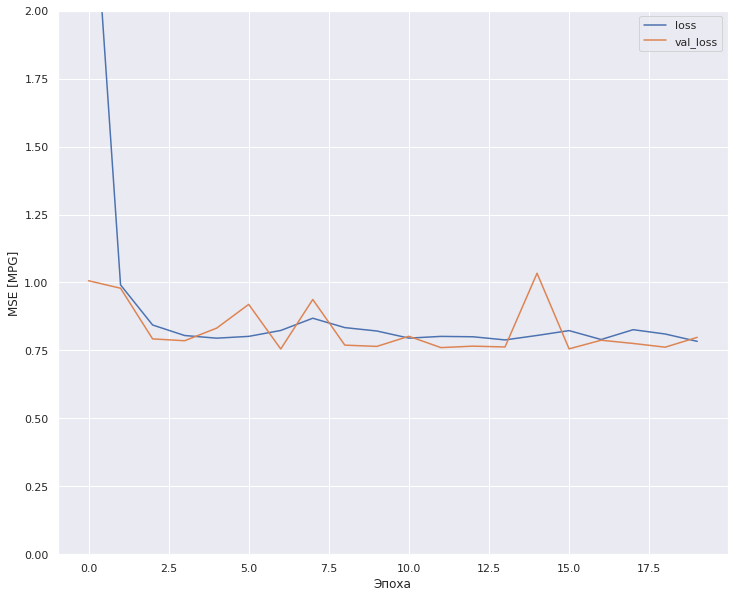

In [109]:
plot_loss(history)

In [110]:
X_test

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
900,90.0,6.313201,58.261074,2038.289409,767.897075,83.191553,25.627620,249.612303,774.578473,71.279418,2768.839085,266.956745
570,90.0,9.057567,68.253199,1945.934610,113.938512,63.526815,21.616401,296.373995,807.273814,75.990895,2975.643321,243.055823
791,90.0,4.976887,67.110068,1952.857390,304.058314,105.938449,24.791859,318.140519,386.789237,72.221529,2640.186903,84.490129
189,0.0,2.438243,53.971899,2056.616323,1546.290886,126.109863,21.950931,270.407471,633.390973,71.337572,2811.005983,200.116156
372,0.0,12.452169,44.471612,2002.618092,1049.406341,109.907757,24.090622,325.877073,298.267629,74.602395,2564.521373,145.763464
...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.0,9.903090,45.319430,1986.552440,818.135194,102.614962,17.751531,256.335930,414.212655,72.513747,2427.726923,277.746898
395,0.0,7.927846,37.327435,1918.505388,923.222626,102.856973,21.778325,304.152923,99.372553,76.666930,2821.643613,189.650866
355,0.0,10.110722,80.918147,2003.317070,890.888308,154.966325,24.461730,307.797291,573.015309,71.927507,2570.365126,232.183847
277,0.0,8.606411,39.452706,1983.145504,950.679512,61.074494,22.922922,278.850418,955.745380,69.748799,2851.631846,290.577050


In [111]:
y_test.head(10)

900    1.580433
570    2.147426
791    0.927841
189    1.719814
372    2.717223
191    3.353747
643    2.546782
474    2.579047
65     2.041352
890    3.322189
Name: Соотношение матрица-наполнитель, dtype: float64

In [112]:
len(y_test)

276

9/9 [==============================] - 0s 2ms/step


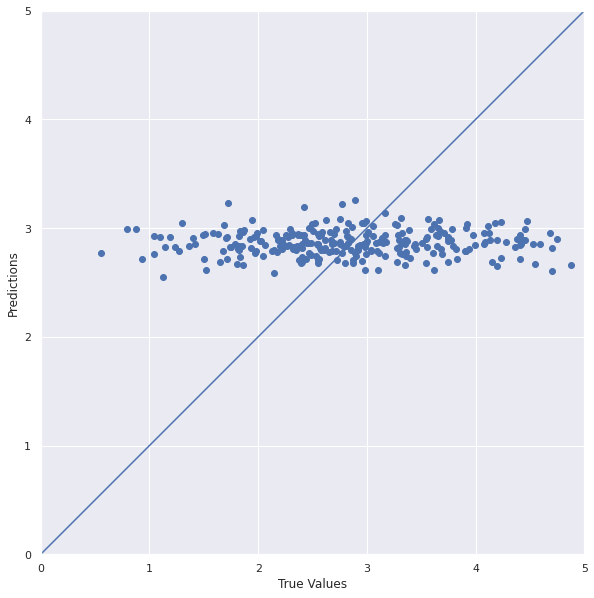

In [113]:
test_predictions = dnn_goal_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [114]:
test_predictions

array([2.9532583, 2.5898142, 2.7138796, 3.2352993, 2.9956942, 2.6642041,
       2.6772375, 2.9324136, 2.7412105, 2.7648268, 2.875955 , 2.9165144,
       2.9140656, 2.6828594, 2.9523447, 2.9208016, 2.8197436, 2.933341 ,
       2.7875404, 2.936983 , 2.9252326, 2.923752 , 2.8532243, 2.9979584,
       2.8563433, 2.8398561, 2.701994 , 2.8135865, 2.6594863, 2.8399324,
       3.0316026, 2.8261912, 2.9508371, 2.812605 , 3.0825896, 2.7868328,
       2.8706245, 3.0917406, 2.7908683, 2.786616 , 2.7680285, 2.7907763,
       3.0355787, 2.8592203, 2.9637408, 2.8394847, 2.8392825, 2.8141866,
       2.9897277, 2.8472204, 2.9686503, 2.7205925, 2.8922954, 2.880149 ,
       2.775558 , 2.7845411, 2.7627447, 2.8935463, 2.8358798, 2.7372115,
       2.8866374, 2.8779159, 2.8296914, 2.7830005, 2.811956 , 2.6050375,
       2.8962042, 2.8518531, 2.858322 , 2.7699375, 2.7676167, 2.7944632,
       2.940236 , 2.8872995, 2.7942257, 2.8043895, 2.8480113, 2.711709 ,
       2.8657217, 2.9177957, 3.218753 , 2.987904 , 

In [115]:
len(test_predictions)

276

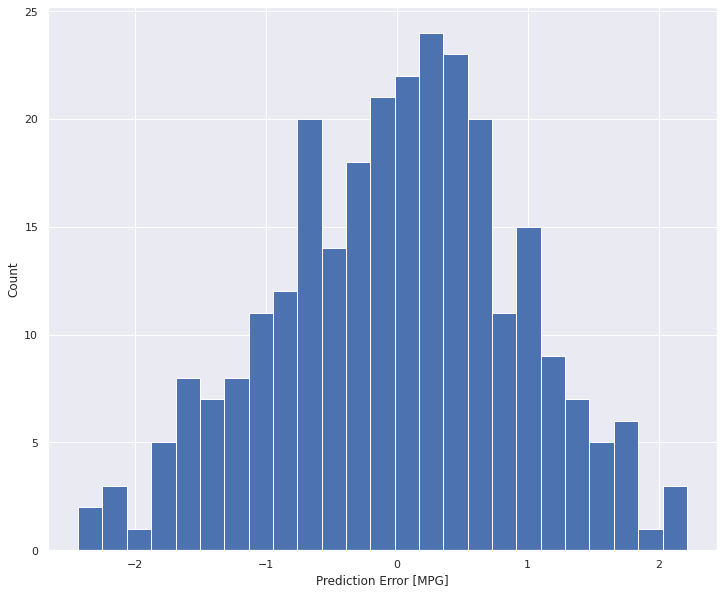

In [116]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

# Сохранение модели

In [117]:
import pickle
lr = LinearRegression()
pickle.dump(lr, open('lr_model.pkl', 'wb'))

In [118]:
model_load = pickle.load(open('/content/lr_model.pkl', 'rb'))